In [1]:
import torch
import torchvision


In [2]:
print("torch version: ", torch.__version__)
print("torchvision version: ", torchvision.__version__)

# try if cuda is available
print("cuda available: ", torch.cuda.is_available())
print("cuda device count: ", torch.cuda.device_count())
print("cuda device name: ", torch.cuda.get_device_name(0))

torch version:  2.1.1+cu118
torchvision version:  0.16.1+cu118
cuda available:  True
cuda device count:  1
cuda device name:  NVIDIA GeForce RTX 2070


In [11]:
# Train YOLOv5s on dataset for 25 epochs
!python train.py --img 640 --batch 8 --epochs 25 --data custom_dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=25, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\90533\Desktop\Yeni': No such file or directory
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

In [13]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.50 --source footage.mp4

detect: weights=['runs/train/exp/weights/last.pt'], source=footage.mp4, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\90533\Desktop\Yeni': No such file or directory
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/215) C:\Users\90533\Desktop\Yeni klasr\yolov5\footage.mp4: 384x640 18 persons, 37.0ms
video 1/1 (2/215) C:\Users\90533\Desktop\Yeni klasr\yolov5\footage.mp4: 384x640 17 persons, 7.0ms
video 1/1 (3/215) C:\Users\90533\Desktop\Yeni klasr\yolo

In [8]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\90533/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-12 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
# Images
imgs = ['ss.png']  # batch of images

# Inference
results = model(imgs)

In [10]:
results.print()

image 1/1: 1080x1920 14 persons, 4 cars, 1 traffic light
Speed: 51.0ms pre-process, 110.0ms inference, 7.0ms NMS per image at shape (1, 3, 384, 640)


In [11]:
results.pandas().xyxy

[           xmin        ymin         xmax        ymax  confidence  class  \
 0    878.302246  466.903320   913.648438  575.552063    0.816265      0   
 1   1609.350952  438.993408  1634.288818  502.813354    0.776750      0   
 2    444.203308  531.071777   489.011475  629.844971    0.774900      0   
 3    751.713257  462.566528   787.494751  555.903809    0.769254      0   
 4   1168.498047  555.245972  1211.863525  684.437012    0.762738      0   
 5    615.380371  547.925537   669.286316  672.016296    0.760076      0   
 6   1342.494263  429.057190  1366.422852  500.538696    0.755972      0   
 7   1121.274048  487.157501  1170.707275  589.171509    0.728729      0   
 8   1457.580811  448.004333  1480.444092  527.033020    0.718269      0   
 9   1408.389160  403.586884  1432.244629  460.405701    0.660036      0   
 10   610.366211  481.084900   643.572144  562.315247    0.634455      0   
 11    60.931309  323.263489    87.647018  397.274902    0.512850      9   
 12   436.22

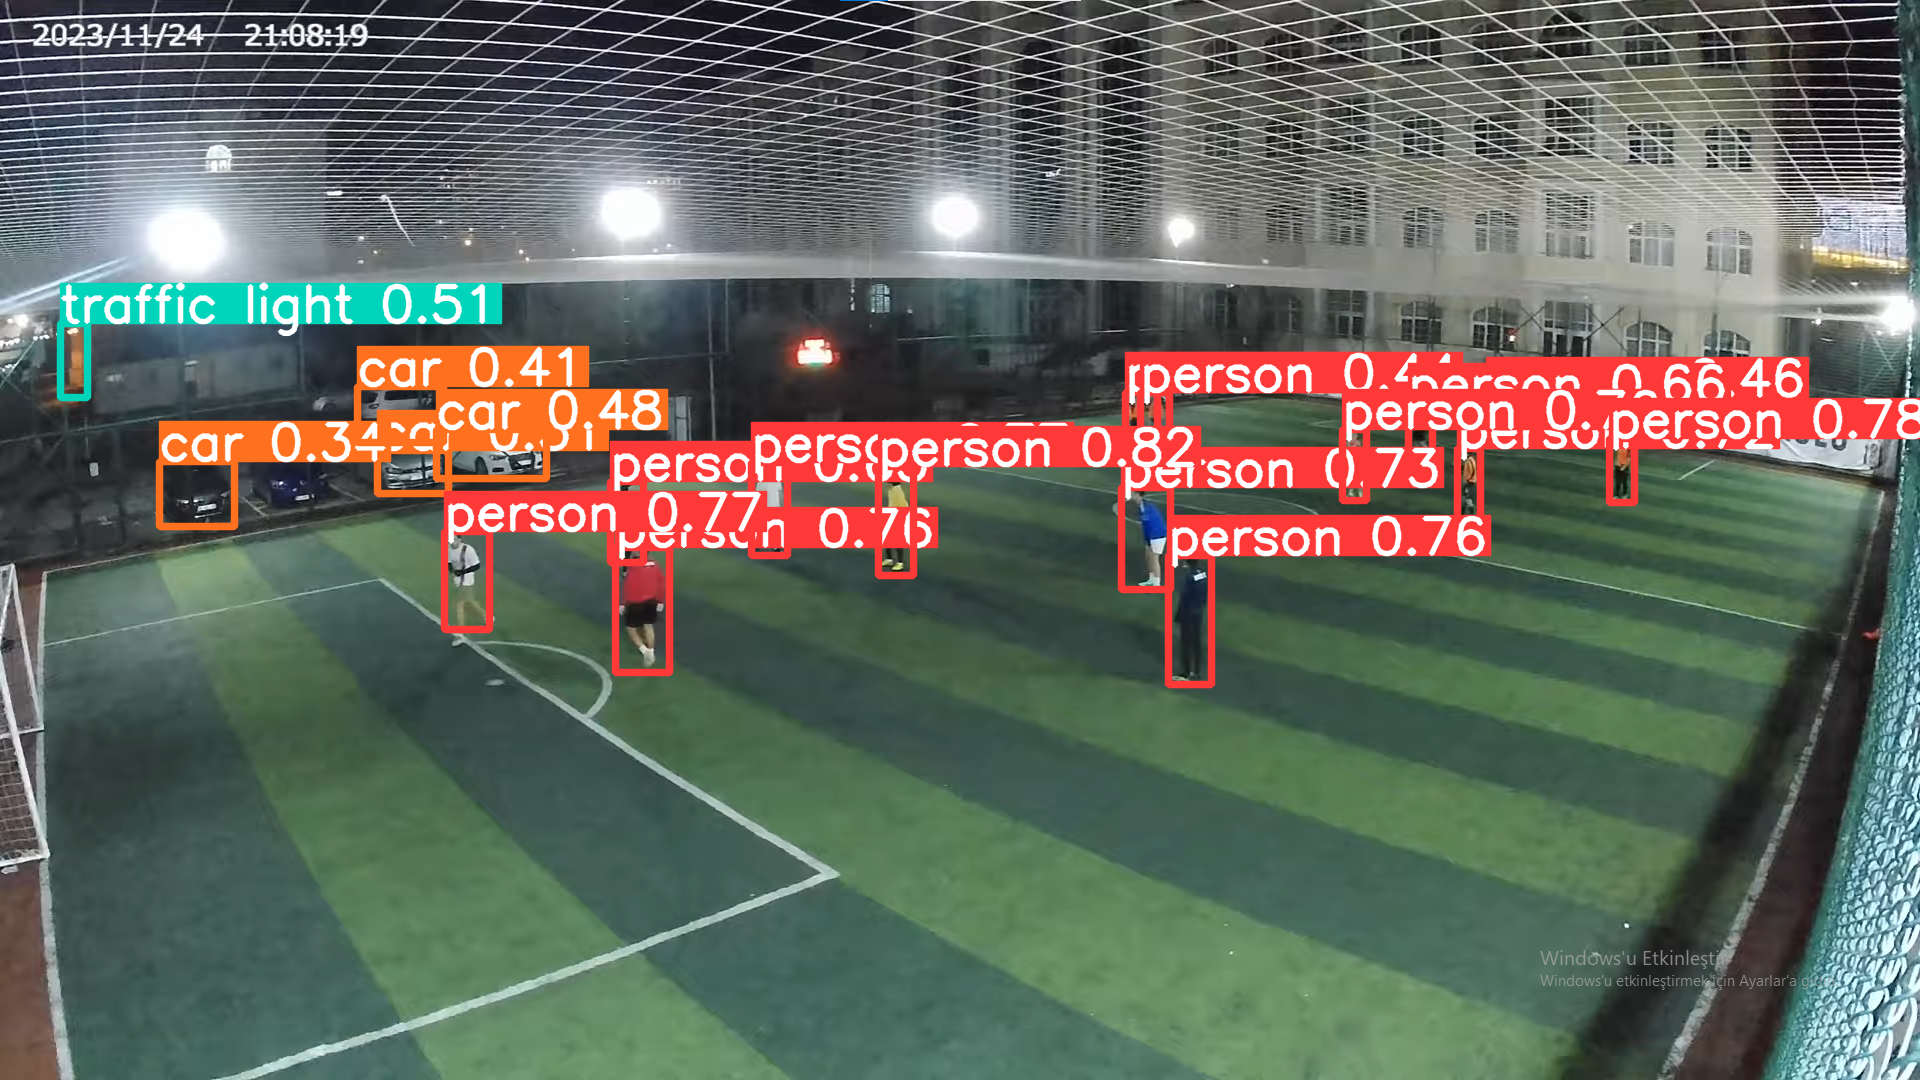

In [12]:
results.show()

In [ ]:
torch.hub.load()